___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import plotly.express as px

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)
from scikitplot.metrics import plot_roc, plot_precision_recall


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import shap

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [104]:
dfm = pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding="latin")
dff = pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq", encoding="latin")

In [105]:
dfm.shape

(4082, 108)

In [106]:
dff.shape

(1986, 108)

In [107]:
dfm.info(max_cols=108)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       4082 non-null   int64 
 1    abdominalextensiondepthsitting  4082 non-null   int64 
 2    acromialheight                  4082 non-null   int64 
 3    acromionradialelength           4082 non-null   int64 
 4    anklecircumference              4082 non-null   int64 
 5    axillaheight                    4082 non-null   int64 
 6    balloffootcircumference         4082 non-null   int64 
 7    balloffootlength                4082 non-null   int64 
 8    biacromialbreadth               4082 non-null   int64 
 9    bicepscircumferenceflexed       4082 non-null   int64 
 10   bicristalbreadth                4082 non-null   int64 
 11   bideltoidbreadth                4082 non-null   int64 
 12   bimalleolarbreadth              

In [108]:
dfm.select_dtypes(include="object").head(10)

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,NaN,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,NaN,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,NaN,Right hand
5,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,91L,Kentucky,NaN,Right hand
6,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,91D,Mississippi,NaN,Right hand
7,Male,6-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Romania,NaN,Right hand
8,Male,6-Oct-10,Fort Hood,Regular Army,Combat Service Support,92F,Arkansas,NaN,Right hand
9,Male,6-Oct-10,Fort Hood,Regular Army,Combat Support,25L,Maryland,NaN,Left hand


In [109]:
dff.select_dtypes(include ="object").head(10)

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
0,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,NaN,Right hand
1,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,Mexican,Right hand
2,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,NaN,Right hand
3,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,Caribbean Islander,Right hand
4,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,NaN,Right hand
5,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Germany,NaN,Left hand
6,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35F,New Mexico,NaN,Right hand
7,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,92Y,American Samoa,Polynesian Samoan,Right hand
8,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,92F,Virginia,NaN,Left hand
9,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,31B,South Korea,NaN,Right hand


3 Main Encoders

- One-Hot Encoder
    - dog, cat, mouse, dog, cat
    - 1, 2, 3, 1, 2
- Binary Encoder
    - dog, cat, mouse, dog, cat
    - 01, 10, 11, 01, 10
- Ordinal Encoder
    - Iron, Bronze, Silver, Gold
    - 0, 1, 2, 3

In [110]:
print("Total unique values:",dfm.Ethnicity.nunique())
dfm.Ethnicity.value_counts()
# Most ethnicities are reported below 10 times; high cardinality

Total unique values: 159


Ethnicity
Mexican                                      222
Puerto Rican                                 131
Caribbean Islander                            66
Cherokee                                      45
Filipino                                      39
Korean                                        30
Dominican                                     20
Chinese                                       16
Japanese                                      16
Vietnamese                                    14
Cuban                                         13
Colombian                                     12
Arab or Middle Eastern                        11
Salvadoran                                    10
East/Asian Indian                              7
Mexican Puerto Rican                           7
Dominican Puerto Rican                         6
Peruvian                                       6
Laotian                                        5
Hmong                                          5
Honduran  

## Explore Data

In [111]:
dff.SubjectNumericRace.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1986 entries, 0 to 1985
Series name: SubjectNumericRace
Non-Null Count  Dtype
--------------  -----
1986 non-null   int64
dtypes: int64(1)
memory usage: 15.6 KB


In [112]:
dff.DODRace.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1986 entries, 0 to 1985
Series name: DODRace
Non-Null Count  Dtype
--------------  -----
1986 non-null   int64
dtypes: int64(1)
memory usage: 15.6 KB


In [113]:
dfm.SubjectNumericRace.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4082 entries, 0 to 4081
Series name: SubjectNumericRace
Non-Null Count  Dtype
--------------  -----
4082 non-null   int64
dtypes: int64(1)
memory usage: 32.0 KB


In [114]:
dfm.DODRace.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4082 entries, 0 to 4081
Series name: DODRace
Non-Null Count  Dtype
--------------  -----
4082 non-null   int64
dtypes: int64(1)
memory usage: 32.0 KB


In [115]:
dfm.isnull().sum()
# Only ethnicity contains null values

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [116]:
dff.isnull().sum()
# Only ethnicity contains null values, same as the male dataset

SubjectId                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [117]:
dff.Gender.value_counts()

Gender
Female    1986
Name: count, dtype: int64

In [118]:
dfm.Gender.value_counts()

Gender
Male    4082
Name: count, dtype: int64

In [119]:
print(1986 + 4082)
# Checking what our expected merged df shape is to be

6068


In [120]:
pd.DataFrame(dff.columns)

,0
0,SubjectId
1,abdominalextensiondepthsitting
2,acromialheight
3,acromionradialelength
4,anklecircumference
5,axillaheight
6,balloffootcircumference
7,balloffootlength
8,biacromialbreadth
9,bicepscircumferenceflexed


In [121]:
pd.DataFrame(dfm.columns)

,0
0,subjectid
1,abdominalextensiondepthsitting
2,acromialheight
3,acromionradialelength
4,anklecircumference
5,axillaheight
6,balloffootcircumference
7,balloffootlength
8,biacromialbreadth
9,bicepscircumferenceflexed


In [122]:
pd.DataFrame(dfm.columns)
# Male dataset has SubjectId, female dataset has subjectid

,0
0,subjectid
1,abdominalextensiondepthsitting
2,acromialheight
3,acromionradialelength
4,anklecircumference
5,axillaheight
6,balloffootcircumference
7,balloffootlength
8,biacromialbreadth
9,bicepscircumferenceflexed


In [123]:
dfm.rename(columns = {'subjectid':'SubjectId'}, inplace = True)
# Planning on removing column anyways, but for homogeneity we'll keep everything tidy

In [124]:
pd.DataFrame(dfm.columns).head()

,0
0,SubjectId
1,abdominalextensiondepthsitting
2,acromialheight
3,acromionradialelength
4,anklecircumference


In [125]:
pd.DataFrame(dff.columns).head()

,0
0,SubjectId
1,abdominalextensiondepthsitting
2,acromialheight
3,acromionradialelength
4,anklecircumference


## Combining Our Datasets

In [126]:
df = pd.concat([dff,dfm])

In [127]:
df.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 0 to 4081
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [129]:
pd.DataFrame(df.columns).nunique()

0    108
dtype: int64

In [130]:
df.Gender.value_counts()

Gender
Male      4082
Female    1986
Name: count, dtype: int64

In [131]:
df.SubjectsBirthLocation.value_counts()

SubjectsBirthLocation
California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Missouri                     84
Arizona                      84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas            

In [132]:
df.DODRace.value_counts()

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [133]:
df.DODRace.value_counts().sum()

6068

In [134]:
df["SubjectNumericRace"].unique()

array([    2,     3,     1,     8,     6,   218,    21,    51,    31,
           4,     5,    41,    35,    23,    61,    18,   231,    25,
         641,    28,   235,   351,    63,    62,    38,   428,   651,
         251,    42,   431,   631,   423,    64,  2518,    48,  2351,
       42351,    43,   318,   425,   358,   451,   238,  4251])

In [135]:
pd.DataFrame(df.columns)

,0
0,SubjectId
1,abdominalextensiondepthsitting
2,acromialheight
3,acromionradialelength
4,anklecircumference
5,axillaheight
6,balloffootcircumference
7,balloffootlength
8,biacromialbreadth
9,bicepscircumferenceflexed


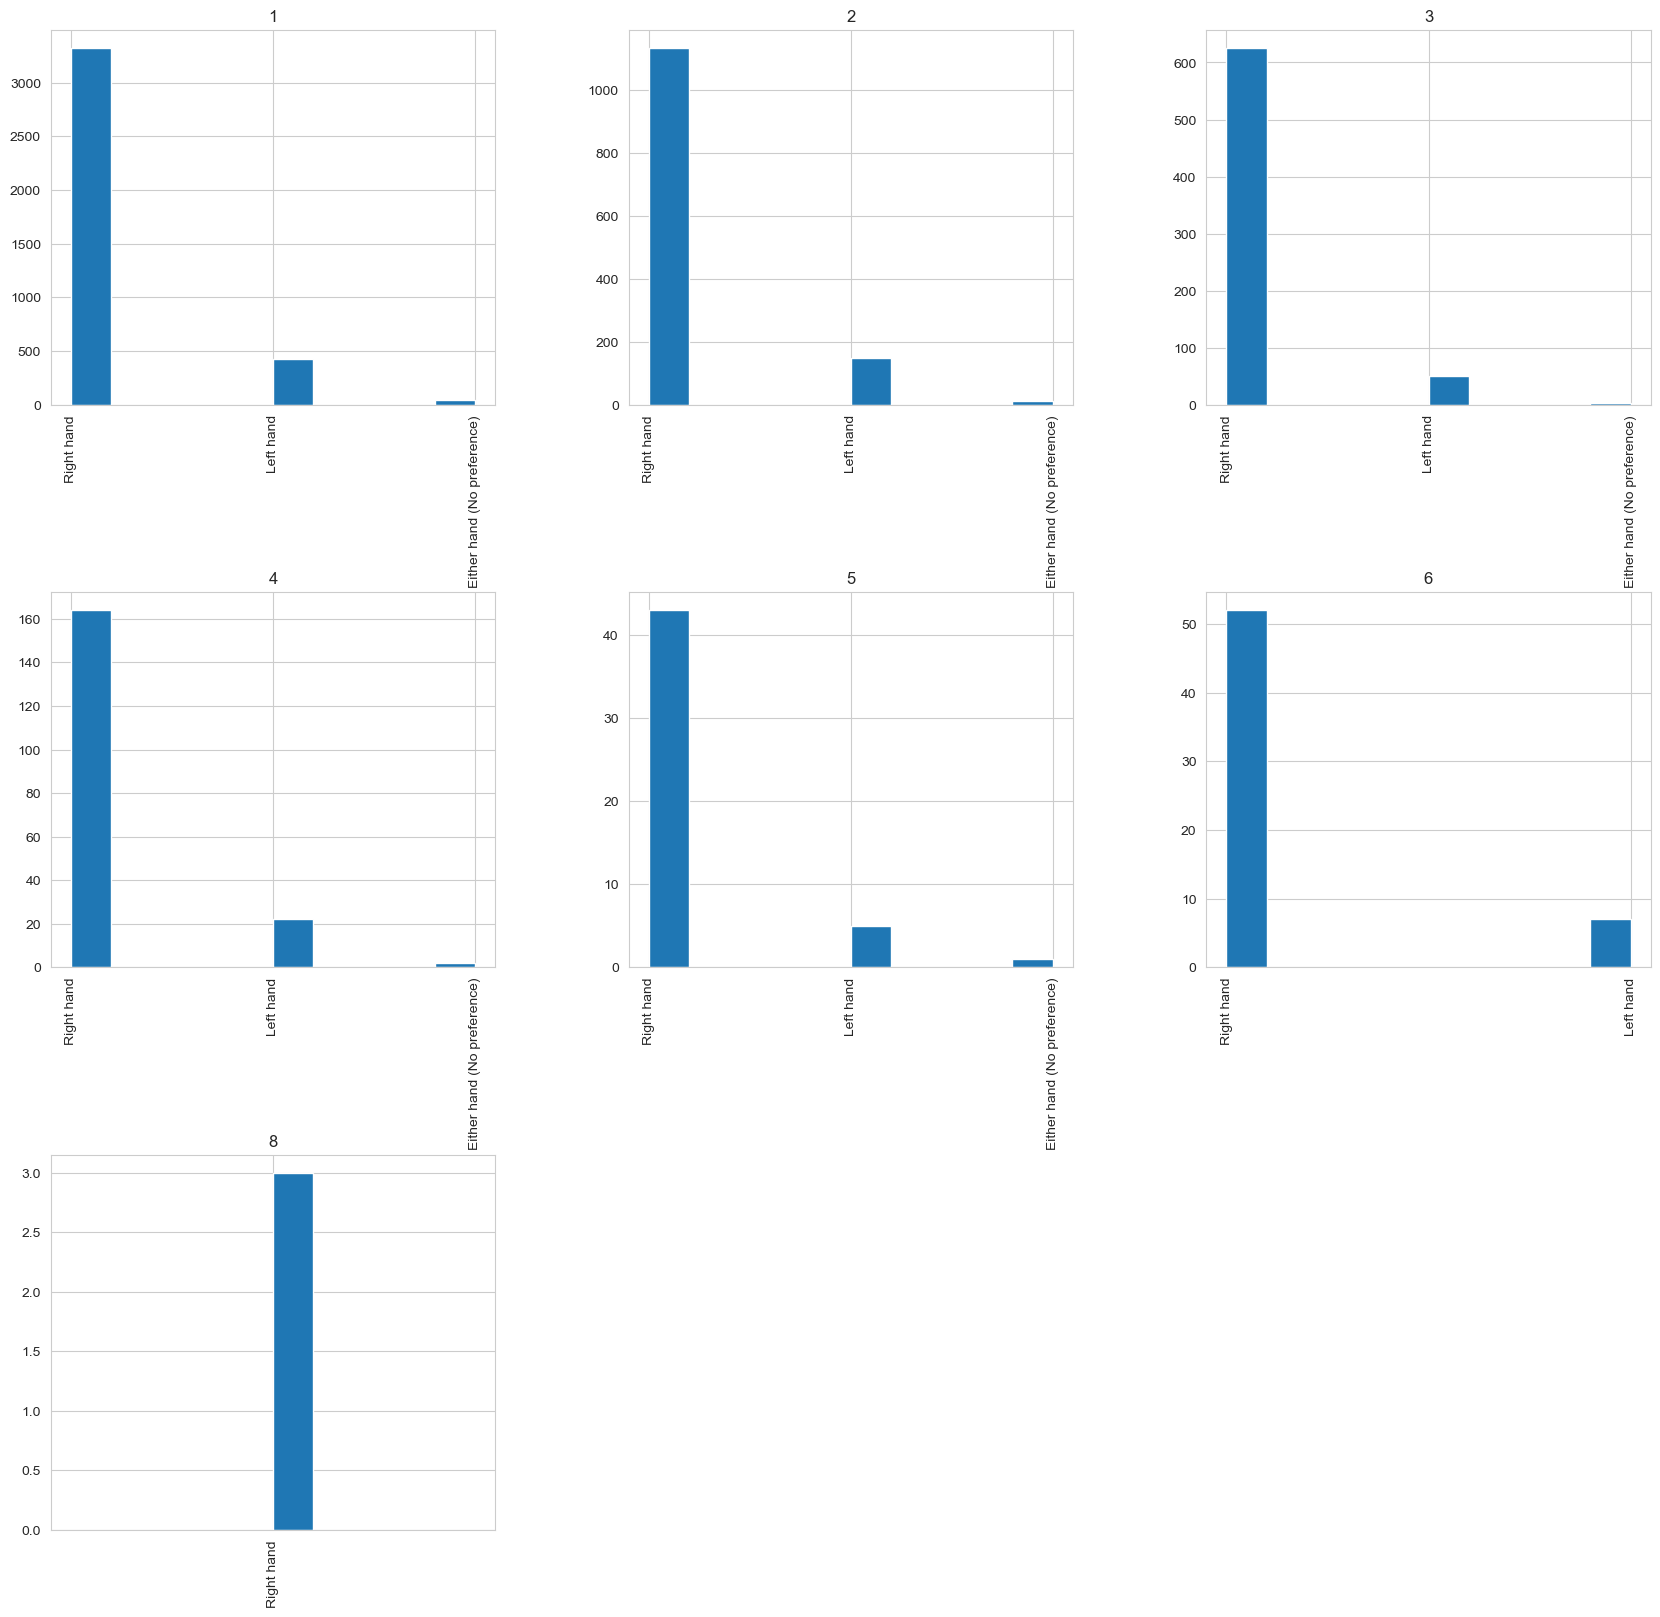

In [136]:
df.WritingPreference.hist(df["DODRace"], figsize=(20,20));
# Here I wanted to see if there was any irregularity in writing hand preference to see if it had any predictive power

In [137]:
pd.DataFrame(df.WritingPreference.groupby(df.DODRace).value_counts(normalize=True))
# The proportions seem identical, except for class 3 (Hispanic) 

proportion
DODRace WritingPreference                      
1       Right hand                        0.877
        Left hand                         0.111
        Either hand (No preference)       0.011
2       Right hand                        0.874
        Left hand                         0.116
        Either hand (No preference)       0.010
3       Right hand                        0.922
        Left hand                         0.074
        Either hand (No preference)       0.004
4       Right hand                        0.872
        Left hand                         0.117
        Either hand (No preference)       0.011
5       Right hand                        0.878
        Left hand                         0.102
        Either hand (No preference)       0.020
6       Right hand                        0.881
        Left hand                         0.119
8       Right hand                        1.000

In [138]:
df.DODRace.value_counts()

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

#### I would drop *WritingPreference*, but because its proportion is different in class 3, I will keep it as it could have predictive power for our minority class (since we're dropping DODRace classes below 500 value counts). Anything I can use to help predict the minority class I will keep.

### To Feature Engineer:

SubjectBirthLocation (Could turn into US vs. Other or US Regions)

In [139]:
collist = []
for row in df:
    collist.append(row)
    
print(collist)
# Testing dataframe columns list

['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength', 'heel

In [140]:
df.duplicated().sum()

0

In [141]:
df.info(max_cols=108)

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    SubjectId                       6068 non-null   int64 
 1    abdominalextensiondepthsitting  6068 non-null   int64 
 2    acromialheight                  6068 non-null   int64 
 3    acromionradialelength           6068 non-null   int64 
 4    anklecircumference              6068 non-null   int64 
 5    axillaheight                    6068 non-null   int64 
 6    balloffootcircumference         6068 non-null   int64 
 7    balloffootlength                6068 non-null   int64 
 8    biacromialbreadth               6068 non-null   int64 
 9    bicepscircumferenceflexed       6068 non-null   int64 
 10   bicristalbreadth                6068 non-null   int64 
 11   bideltoidbreadth                6068 non-null   int64 
 12   bimalleolarbreadth              6068 

In [142]:
# This is a dictionary of states and their regions.
states_by_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Mid Atlantic",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Mid Atlantic",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Mid Atlantic",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Mid Atlantic",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "Mid Atlantic",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West",
    "District of Columbia": "Mid Atlantic"
}

In [143]:
# This is a dictionary of the countries and their continents.
countries_by_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Cape Verde": "Africa",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo, Democratic Republic of the": "Africa",
    "Congo, Republic of the": "Africa",
    "Costa Rica": "North America",
    "Côte d'Ivoire": "Africa",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "East Timor": "Asia",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "England": "Europe",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Federated States of Micronesia": "Oceania",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Guiana": "South America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guadalupe" : "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kosovo": "Europe",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macedonia, Republic of": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Scotland": "Europe",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "US Virgin Islands": "North America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Wales": "Europe",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "South America": "South America",
    "Burma": "Asia",
    "Korea": "Asia",
    "Northern Mariana Islands": "Oceania",
    "Bermuda": "North America",
}


In [146]:
df["SubjectsBirthLocation"].value_counts()

SubjectsBirthLocation
California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Missouri                     84
Arizona                      84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas            

In [147]:
df2 = df["SubjectsBirthLocation"].map(states_by_region | countries_by_continent)
df2.head()

0          Europe
1            West
2           South
3    Mid Atlantic
4           South
Name: SubjectsBirthLocation, dtype: object

In [148]:
df2.value_counts()

SubjectsBirthLocation
South            1856
Midwest          1429
West              864
Northeast         632
Mid Atlantic      455
Asia              314
North America     265
Europe            149
South America      44
Africa             35
Oceania            25
Name: count, dtype: int64

In [149]:
df2.nunique()

11

In [150]:
df2.info()

<class 'pandas.core.series.Series'>
Index: 6068 entries, 0 to 4081
Series name: SubjectsBirthLocation
Non-Null Count  Dtype 
--------------  ----- 
6068 non-null   object
dtypes: object(1)
memory usage: 94.8+ KB


In [151]:
df["SubjectsBirthLocation"].info()

<class 'pandas.core.series.Series'>
Index: 6068 entries, 0 to 4081
Series name: SubjectsBirthLocation
Non-Null Count  Dtype 
--------------  ----- 
6068 non-null   object
dtypes: object(1)
memory usage: 94.8+ KB


In [ ]:
df3 = df.copy()


In [152]:
df3.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [153]:
df3["SubjectsBirthLocation"] = df2

In [154]:
df3.head()
# Now the Subject Birth Location will be based on their region in the US or the continent if outside US

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Europe,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,West,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,South,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,Mid Atlantic,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,63

### Features to Drop:

SubjectId: No predictive power

Ethnicity: Many null

SubjectNumericRace: Too messy (Can be multidigit + competitor to target (DODRace))

Date: No predictive power

Installation: No predictive power

Component: No predictive power

Branch: No predictive power

PrimaryMOS: No predictive power

Heightin: stature feature exists

Weightlbs: weightkg feature exists

In [156]:
# Let's begin dropping unnecessary columns
df3.info(max_cols=108)

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    SubjectId                       6068 non-null   int64 
 1    abdominalextensiondepthsitting  6068 non-null   int64 
 2    acromialheight                  6068 non-null   int64 
 3    acromionradialelength           6068 non-null   int64 
 4    anklecircumference              6068 non-null   int64 
 5    axillaheight                    6068 non-null   int64 
 6    balloffootcircumference         6068 non-null   int64 
 7    balloffootlength                6068 non-null   int64 
 8    biacromialbreadth               6068 non-null   int64 
 9    bicepscircumferenceflexed       6068 non-null   int64 
 10   bicristalbreadth                6068 non-null   int64 
 11   bideltoidbreadth                6068 non-null   int64 
 12   bimalleolarbreadth              6068 

In [157]:
dropped_cols = ["SubjectId",
                "SubjectNumericRace",
                "Weightlbs",
                "Heightin",
                "PrimaryMOS",
                "Branch",
                "Component",
                "Installation",
                "Date",
                "Ethnicity",]

In [158]:
df3.drop(columns=dropped_cols, inplace=True)

In [159]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 0 to 4081
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  6068 non-null   int64 
 1   acromialheight                  6068 non-null   int64 
 2   acromionradialelength           6068 non-null   int64 
 3   anklecircumference              6068 non-null   int64 
 4   axillaheight                    6068 non-null   int64 
 5   balloffootcircumference         6068 non-null   int64 
 6   balloffootlength                6068 non-null   int64 
 7   biacromialbreadth               6068 non-null   int64 
 8   bicepscircumferenceflexed       6068 non-null   int64 
 9   bicristalbreadth                6068 non-null   int64 
 10  bideltoidbreadth                6068 non-null   int64 
 11  bimalleolarbreadth              6068 non-null   int64 
 12  bitragionchinarc                6068 non-null   int64

In [162]:
df3["DODRace"] = df3.DODRace.map({1: "White", 2: "Black", 3: "Hispanic", 4: "Asian", 
                    5: "Native American", 6: "Pacific Islander", 8: "Other"})

In [160]:
df3.DODRace.value_counts()
# 

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [163]:
df3.DODRace.value_counts()

DODRace
White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: count, dtype: int64

In [164]:
df3.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,Europe,Black,26,Right hand
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,West,Hispanic,21,Right hand
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,South,White,23,Right hand
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,Mid Atlantic,Black,22,Right hand
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,South,White,45,Right hand


In [165]:
df4 = df3[df3["DODRace"].isin(["White", "Black", "Hispanic"])]
df4.shape

(5769, 98)

In [166]:
# We must reset the index of the dataframe, because we have just dropped numerous rows
df4.reset_index(drop=True, inplace=True)

In [176]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.000,247.254,37.458,155.000,220.000,243.000,272.000,451.000
acromialheight,5769.000,1408.630,78.303,1146.000,1353.000,1412.000,1464.000,1683.000
acromionradialelength,5769.000,328.072,20.445,249.000,314.000,328.000,342.000,393.000
anklecircumference,5769.000,225.202,15.966,156.000,214.000,225.000,235.000,293.000
axillaheight,5769.000,1301.903,71.261,1062.000,1252.000,1304.000,1351.000,1553.000
balloffootcircumference,5769.000,244.408,16.804,186.000,233.000,245.000,256.000,306.000
balloffootlength,5769.000,195.119,13.379,151.000,186.000,196.000,205.000,245.000
biacromialbreadth,5769.000,399.706,30.124,283.000,377.000,404.000,422.000,489.000
bicepscircumferenceflexed,5769.000,341.663,41.271,216.000,312.000,342.000,370.000,490.000
bicristalbreadth,5769.000,274.903,19.240,197.000,262.000,274.000,288.000,362.000


In [168]:
fig = px.imshow(df4.corr(numeric_only=True), text_auto=True, aspect="auto")
fig.show()

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [170]:
X = df4.drop(columns=["DODRace"])
y = df4.DODRace

In [171]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101, stratify=y
)

In [172]:
X_train.shape

(4615, 97)

In [173]:
y_train.shape

(4615,)

In [174]:
X_test.shape

(1154, 97)

In [175]:
y_test.shape

(1154,)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [178]:
# This function will allow us to evaluate our models and see the confusion matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [183]:
catcols = X_train.select_dtypes("object").columns

Encoding our categorical columns:
- Gender
- SubjectBirthLocation
- Writing Preference

In [186]:
col_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), catcols),
    remainder=MinMaxScaler(), verbose_feature_names_out=False,)
col_transformer = col_trans.set_output(transform="pandas")

In [189]:
steps = [("OneHotEncoder", col_trans), ("log", LogisticRegression(
    class_weight="balanced", max_iter=10000, random_state=101),),]

log_model = Pipeline(steps=steps)
log_model.fit(X_train, y_train) 

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [190]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[239  18   3]
 [  9 104  23]
 [ 22  96 640]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.48      0.76      0.59       136
       White       0.96      0.84      0.90       758

    accuracy                           0.85      1154
   macro avg       0.77      0.84      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 959   51   28]
 [  36  418   89]
 [  71  373 2590]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91      1038
    Hispanic       0.50      0.77      0.60       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.78      0.85      0.81      4615
weighted avg       0.89      0.86      0.87      4615



### Logistic Model GridsearchCV

In [193]:
lr_params = {
    "log__C": [0.5, 1], "log__penalty": ["l1", "l2"],
    "log__solver": ["sag","liblinear", "lbfgs"],}
log_model_gs_pipe = Pipeline(steps=steps)

log_model_gs = GridSearchCV(
    estimator=log_model_gs_pipe,
    param_grid=lr_params,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
    return_train_score=True,)

In [194]:
log_model_gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['sag', 'liblinear', 'lbfgs']},
             return_train_score=True, scoring='accuracy')

In [195]:
log_model_gs.best_params_

{'log__C': 1, 'log__penalty': 'l1', 'log__solver': 'liblinear'}

In [200]:
pd.DataFrame(log_model_gs.cv_results_).loc[log_model_gs.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.887
mean_train_score   0.898
Name: 7, dtype: object

In [201]:
eval_metric(log_model_gs, X_train, y_train, X_test, y_test)

Test_Set
[[242  11   7]
 [ 10  83  43]
 [ 19  31 708]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.66      0.61      0.64       136
       White       0.93      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.83      0.83      0.83      1154
weighted avg       0.89      0.90      0.89      1154


Train_Set
[[ 958   27   53]
 [  40  335  168]
 [  62  123 2849]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91      1038
    Hispanic       0.69      0.62      0.65       543
       White       0.93      0.94      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.84      0.83      0.83      4615
weighted avg       0.89      0.90      0.90      4615



Hispanic class prediction is suffering in all metrics.

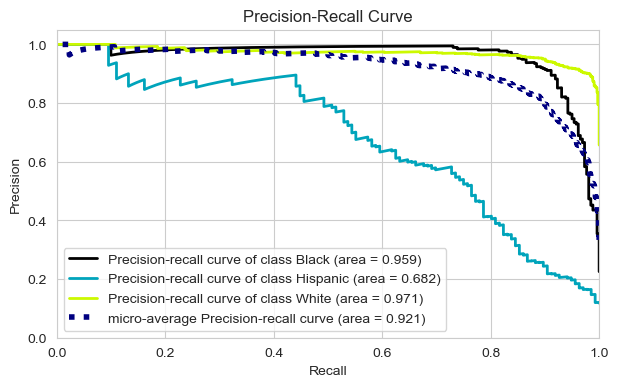

In [206]:
l_rc = Pipeline(steps=steps)
l_rc.fit(X_train, y_train)
y_pred_prob = l_rc.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_prob)
plt.show();

In [207]:
y_test_d = pd.get_dummies(y_test).values
y_pred = log_model_gs.predict(X_test)

log_AP = average_precision_score(y_test_d[:, 1], y_pred_prob[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

In [211]:
print("Average Precision:",log_AP,
      "\nF1 Score:",log_f1, "\nRecall:", log_recall)

Average Precision: 0.6818633855838926 
F1 Score: [0.63601533] 
Recall: [0.61029412]


## 2. SVC

### Vanilla SVC model 

In [213]:
svc_steps = [("OneHotEncoder", col_trans),
             ("svc", SVC(class_weight="balanced", random_state=101)),]

svc_pipe = Pipeline(steps=svc_steps)
svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(class_weight='balanced', random_state=101))])

In [214]:
eval_metric(svc_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[237  17   6]
 [ 10 102  24]
 [ 23  93 642]]
              precision    recall  f1-score   support

       Black       0.88      0.91      0.89       260
    Hispanic       0.48      0.75      0.59       136
       White       0.96      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.77      0.84      0.79      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 963   35   40]
 [  21  444   78]
 [  54  288 2692]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1038
    Hispanic       0.58      0.82      0.68       543
       White       0.96      0.89      0.92      3034

    accuracy                           0.89      4615
   macro avg       0.82      0.88      0.84      4615
weighted avg       0.91      0.89      0.89      4615



Hispanic class doing better in recall but precision is still low

In [215]:
f1_hispanic = make_scorer(f1_score, labels = ["Hispanic"], average=None)
precision_hispanic = make_scorer(precision_score, labels = ["Hispanic"], average=None)
recall_hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

scoring_hispanic = {"precision_hispanic":precision_hispanic, "recall_hispanic":recall_hispanic,
           "f1_hispanic":f1_hispanic}

# Adding scoring focused on hispanic class

In [222]:
svc_cv = Pipeline(steps=svc_steps)

hisp_svc_scores = cross_validate(svc_cv, X_train, y_train, scoring=scoring_hispanic,
                        cv=10, n_jobs=-1, return_train_score=True)
scores = pd.DataFrame(hisp_svc_scores)
scores.mean()[2:]

test_precision_hispanic    0.483
train_precision_hispanic   0.574
test_recall_hispanic       0.672
train_recall_hispanic      0.818
test_f1_hispanic           0.561
train_f1_hispanic          0.675
dtype: float64

###  SVC Model GridsearchCV

In [223]:
pipe_svc_gs = Pipeline(steps = svc_steps)

svc_params = {'svc__C':[0.01, 0.1, 1, 10],
              'svc__kernel':['linear','rbf','sigmoid','poly'],
              'svc__gamma':["scale", "auto"],
              'svc__degree':[2, 3, 4]}

svc_gs = GridSearchCV(estimator = pipe_svc_gs, param_grid = svc_params,
                               scoring = f1_hispanic, cv = 10, n_jobs = -1)

In [224]:
svc_gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 10], 'svc__degree': [2, 3, 4],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             scoring=make_scorer(f1_score, labels=['Hispanic'], average=None))

In [226]:
svc_gs.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc',
                 SVC(C=10, class_weight='balanced', degree=2, gamma='auto',
                     random_state=101))])

In [227]:
best_svc_steps = [('transformer', col_trans), ('svc', SVC(
    C = 10, degree = 2, gamma = 'auto', kernel = 'poly'))]

best_svc_pipe = Pipeline(steps = best_svc_steps)
best_svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=10, degree=2, gamma='auto', kernel='poly'))])

In [228]:
eval_metric(best_svc_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[226   3  31]
 [  8  36  92]
 [  5   2 751]]
              precision    recall  f1-score   support

       Black       0.95      0.87      0.91       260
    Hispanic       0.88      0.26      0.41       136
       White       0.86      0.99      0.92       758

    accuracy                           0.88      1154
   macro avg       0.89      0.71      0.74      1154
weighted avg       0.88      0.88      0.86      1154


Train_Set
[[ 861   12  165]
 [  35  127  381]
 [  16   14 3004]]
              precision    recall  f1-score   support

       Black       0.94      0.83      0.88      1038
    Hispanic       0.83      0.23      0.36       543
       White       0.85      0.99      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.87      0.68      0.72      4615
weighted avg       0.87      0.87      0.84      4615



## 3. RF

### Vanilla RF Model

In [288]:
ordinal_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer((
    ordinal_enc, catcols), remainder="passthrough", verbose_feature_names_out=False)

In [231]:
rf_steps = [
    ("OrdinalEncoder", column_trans),
    ("rf", RandomForestClassifier(class_weight="balanced", random_state=101)),]

rf_pipe = Pipeline(steps=rf_steps)

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [232]:
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[171   0  89]
 [  7   9 120]
 [ 10   2 746]]
              precision    recall  f1-score   support

       Black       0.91      0.66      0.76       260
    Hispanic       0.82      0.07      0.12       136
       White       0.78      0.98      0.87       758

    accuracy                           0.80      1154
   macro avg       0.84      0.57      0.59      1154
weighted avg       0.81      0.80      0.76      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [235]:
rf_cv = Pipeline(steps=rf_steps)

hisp_rf_scores = cross_validate(rf_cv, X_train, y_train, scoring=scoring_hispanic,
                        cv=10, n_jobs=-1, return_train_score=True)
scores = pd.DataFrame(hisp_rf_scores)
scores.mean()[2:]

test_precision_hispanic    0.626
train_precision_hispanic   1.000
test_recall_hispanic       0.044
train_recall_hispanic      1.000
test_f1_hispanic           0.081
train_f1_hispanic          1.000
dtype: float64

Terribly overfitting

### RF Model GridsearchCV

In [280]:
rf_params = {
    "RF_model__n_estimators": [200, 400, 500],
    "RF_model__max_depth": [2, 3, 4, 5],
}

rf_steps_gs = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

pipe_rf_gs = Pipeline(steps=rf_steps_gs)

rf_gs = GridSearchCV(estimator = pipe_rf_gs, param_grid = rf_params,
                               scoring = precision_hispanic, n_jobs = -1,
                               return_train_score=True)

In [281]:
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4, 5],
                         'RF_model__n_estimators': [200, 400, 500]},
             return_train_score=True,
             scoring=make_scorer(precision_score, labels=['Hispanic'], average=None))

In [282]:
rf_gs.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        n_estimators=200, random_state=101))])

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=101)

In [283]:
eval_metric(rf_gs, X_train, y_train, X_test, y_test)

Test_Set
[[211  28  21]
 [ 22  85  29]
 [ 52 195 511]]
              precision    recall  f1-score   support

       Black       0.74      0.81      0.77       260
    Hispanic       0.28      0.62      0.38       136
       White       0.91      0.67      0.77       758

    accuracy                           0.70      1154
   macro avg       0.64      0.70      0.64      1154
weighted avg       0.80      0.70      0.73      1154


Train_Set
[[ 887   75   76]
 [  44  377  122]
 [ 218  659 2157]]
              precision    recall  f1-score   support

       Black       0.77      0.85      0.81      1038
    Hispanic       0.34      0.69      0.46       543
       White       0.92      0.71      0.80      3034

    accuracy                           0.74      4615
   macro avg       0.68      0.75      0.69      4615
weighted avg       0.82      0.74      0.76      4615



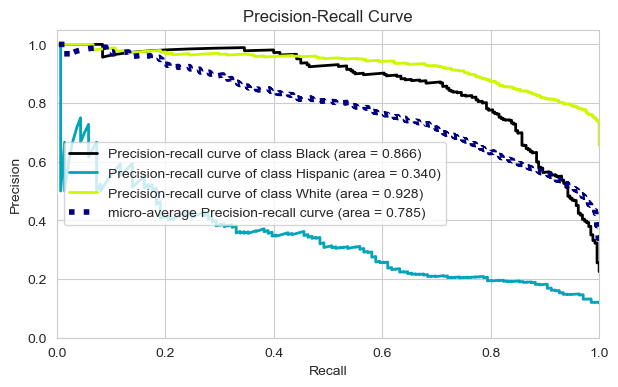

In [284]:
rf_steps_gs = [
    ("OrdinalEncoder", column_trans),
    ("RF_model",RandomForestClassifier(
        class_weight="balanced", max_depth=5, n_estimators=200, random_state=101),),]

rf_rc = Pipeline(steps=rf_steps_gs)

rf_rc.fit(X_train, y_train)

y_pred_prob = rf_rc.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_prob)
plt.show();

In [287]:
rf_AP = average_precision_score(y_test_d[:, 1], y_pred_prob[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
print("Average Precision:",rf_AP,
      "\nF1 Score:",rf_f1, "\nRecall:", rf_recall)

Average Precision: 0.34036679737095926 
F1 Score: [0.63601533] 
Recall: [0.61029412]


## 4. XGBoost

### Vanilla XGBoost Model

XGBoost handles ordinal encoding starting from 0, unlike sklearn where it starts from 1.

We have to change our label classes.

Sklearn sorts classes that were encoded in alphabetical order, thats why Black is set to 0, Hispanic to 1, and White to 2.

In [289]:
y_train_x = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_x = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})

In [290]:
xgb_steps = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]
xgb_pipe = Pipeline(steps=xgb_steps)
xgb_pipe.fit(X_train, y_train_x)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callb...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [291]:
eval_metric(xgb_pipe, X_train, y_train_x, X_test, y_test_x)

Test_Set
[[222  10  28]
 [ 11  55  70]
 [  9   9 740]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       260
           1       0.74      0.40      0.52       136
           2       0.88      0.98      0.93       758

    accuracy                           0.88      1154
   macro avg       0.85      0.74      0.78      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### XGBoost Model GridsearchCV

In [299]:
xgb_params = {
    "XGB_model__n_estimators": [20, 40, 100],
    "XGB_model__max_depth": [1, 2, 3, 4],
    "XGB_model__learning_rate": [0.03, 0.05, 0.1],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.5, 0.8, 1],
}

In [300]:
xgb_pipe = Pipeline(steps=xgb_steps)

xgb_gs = GridSearchCV(estimator=xgb_pipe, param_grid=xgb_params,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5, n_jobs=-1, return_train_score=True,)

In [301]:
xgb_gs.fit(X_train, y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('XGB_model',
                                        XGBClassifier(base_s...
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.5, 0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05, 0.1],
                         'XGB_model__max_depth': [1, 2, 3, 4],
                         'XGB_model__n_estimators': [20, 40, 100],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [302]:
eval_metric(xgb_gs, X_train, y_train_x, X_test, y_test_x)

Test_Set
[[220   9  31]
 [  9  56  71]
 [ 10   8 740]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       260
           1       0.77      0.41      0.54       136
           2       0.88      0.98      0.93       758

    accuracy                           0.88      1154
   macro avg       0.86      0.74      0.78      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[ 986    4   48]
 [  15  338  190]
 [   7    4 3023]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1038
           1       0.98      0.62      0.76       543
           2       0.93      1.00      0.96      3034

    accuracy                           0.94      4615
   macro avg       0.96      0.86      0.89      4615
weighted avg       0.94      0.94      0.94      4615



In [303]:
xgb_gs.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.1,
 'XGB_model__max_depth': 4,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 1}

In [304]:
pd.DataFrame(xgb_gs.cv_results_).loc[
    xgb_gs.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.333
mean_train_score   0.684
Name: 143, dtype: object

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [305]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [306]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), catcols),
    remainder=MinMaxScaler(),
)

In [317]:
X_train_oneh = column_trans.fit_transform(X_train)
over = SMOTE()
X_train_o, y_train_o= over.fit_resample(X_train_oneh, y_train)

In [318]:
y_train_o.value_counts()

DODRace
Hispanic    3034
White       3034
Black       3034
Name: count, dtype: int64

## Logistic Regression Over/ Under Sampling

{'log__C': 1, 'log__penalty': 'l1', 'log__solver': 'liblinear'}

In [323]:
steps_os = [('transformer', column_trans), ('over', over),
            ('logistic', LogisticRegression(C = 1, penalty = 'l1', class_weight = 'balanced', solver = 'liblinear'))]
lr_ovrs_pipe = Pipeline(steps=steps_os)
lr_ovrs_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('over', SMOTE()),
                ('logistic',
                 LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                                    solver='liblinear'))])

In [324]:
eval_metric(lr_ovrs_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[243  11   6]
 [ 12 103  21]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.87      0.93      0.90       260
    Hispanic       0.51      0.76      0.61       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 961   39   38]
 [  38  410   95]
 [  67  369 2598]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91      1038
    Hispanic       0.50      0.76      0.60       543
       White       0.95      0.86      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.78      0.85      0.81      4615
weighted avg       0.89      0.86      0.87      4615



### SVC

SVC(C=10, class_weight='balanced', degree=2, gamma='auto', random_state=101)

In [325]:
best_svc_steps_os = [('transformer', column_trans), ('over', over), 
               ('svc', SVC(C = 10, degree = 2, gamma = 'auto', kernel = 'linear'))]

best_svc_pipe_os = Pipeline(steps = best_svc_steps_os)
best_svc_pipe_os.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('over', SMOTE()),
                ('svc', SVC(C=10, degree=2, gamma='auto', kernel='linear'))])

In [326]:
eval_metric(best_svc_pipe_os, X_train, y_train, X_test, y_test)

Test_Set
[[240  15   5]
 [ 11  99  26]
 [ 22  82 654]]
              precision    recall  f1-score   support

       Black       0.88      0.92      0.90       260
    Hispanic       0.51      0.73      0.60       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.88      0.86      0.87      1154


Train_Set
[[ 969   39   30]
 [  28  425   90]
 [  71  352 2611]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1038
    Hispanic       0.52      0.78      0.63       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.79      0.86      0.82      4615
weighted avg       0.89      0.87      0.88      4615



## XGBoost

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.1,
 'XGB_model__max_depth': 4,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 1}

In [327]:
best_xgb_steps_os = [("OrdinalEncoder", column_trans), ('over', over),
               ("xgboost", XGBClassifier(n_estimators = 100,
              max_depth= 4,
              learning_rate = 0.1,
              subsample= 1,
              colsample_bytree= 0.8, random_state=101))]
best_xgb_pipe_os = Pipeline(steps=best_xgb_steps_os)
best_xgb_pipe_os.fit(X_train, y_train_x)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('over', SMOTE()),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [328]:
eval_metric(best_xgb_pipe_os, X_train, y_train_x, X_test, y_test_x)

Test_Set
[[231  14  15]
 [  9  91  36]
 [ 14  63 681]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       260
           1       0.54      0.67      0.60       136
           2       0.93      0.90      0.91       758

    accuracy                           0.87      1154
   macro avg       0.79      0.82      0.80      1154
weighted avg       0.88      0.87      0.87      1154


Train_Set
[[ 990    9   39]
 [  11  435   97]
 [  45  126 2863]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1038
           1       0.76      0.80      0.78       543
           2       0.95      0.94      0.95      3034

    accuracy                           0.93      4615
   macro avg       0.89      0.90      0.89      4615
weighted avg       0.93      0.93      0.93      4615



## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [329]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

0.7916401750238151

Signature: matthews_corrcoef(y_true, y_pred, *, sample_weight=None)
Docstring:
Compute the Matthews correlation coefficient (MCC).

The Matthews correlation coefficient is used in machine learning as a
measure of the quality of binary and multiclass classifications. It takes
into account true and false positives and negatives and is generally
regarded as a balanced measure which can be used even if the classes are of
very different sizes. The MCC is in essence a correlation coefficient value
between -1 and +1. A coefficient of +1 represents a perfect prediction, 0
an average random prediction and -1 an inverse prediction.  The statistic
is also known as the phi coefficient. [source: Wikipedia]

Binary and multiclass labels are supported.  Only in the binary case does
this relate to information about true and false positives and negatives.
See references below.

Read more in the :ref:`User Guide <matthews_corrcoef>`.

Parameters
----------
y_true : array, shape = [n_samples]
    Ground 

In [330]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

0.7914951948059705

Signature: cohen_kappa_score(y1, y2, *, labels=None, weights=None, sample_weight=None)
Docstring:
Compute Cohen's kappa: a statistic that measures inter-annotator agreement.

This function computes Cohen's kappa [1]_, a score that expresses the level
of agreement between two annotators on a classification problem. It is
defined as

.. math::
    \kappa = (p_o - p_e) / (1 - p_e)

where :math:`p_o` is the empirical probability of agreement on the label
assigned to any sample (the observed agreement ratio), and :math:`p_e` is
the expected agreement when both annotators assign labels randomly.
:math:`p_e` is estimated using a per-annotator empirical prior over the
class labels [2]_.

Read more in the :ref:`User Guide <cohen_kappa>`.

Parameters
----------
y1 : array of shape (n_samples,)
    Labels assigned by the first annotator.

y2 : array of shape (n_samples,)
    Labels assigned by the second annotator. The kappa statistic is
    symmetric, so swapping ``y1`` and ``y2`` doesn't change

In [336]:
logistic_kappa = cohen_kappa_score(y_test, lr_ovrs_pipe.predict(X_test))
svc_kappa = cohen_kappa_score(y_test, best_svc_pipe_os.predict(X_test))
xgboost_kappa = cohen_kappa_score(y_test_x, best_xgb_pipe_os.predict(X_test))

In [339]:
all_models_kappa = pd.DataFrame({'Score': [logistic_kappa, svc_kappa, xgboost_kappa],
                        'Models': ['Logistic Regression', 'SVC', 'XGBoost']})
all_models_kappa

,Score,Models
0,0.738,Logistic Regression
1,0.740,SVC
2,0.747,XGBoost


<Axes: xlabel='Models', ylabel='Score'>

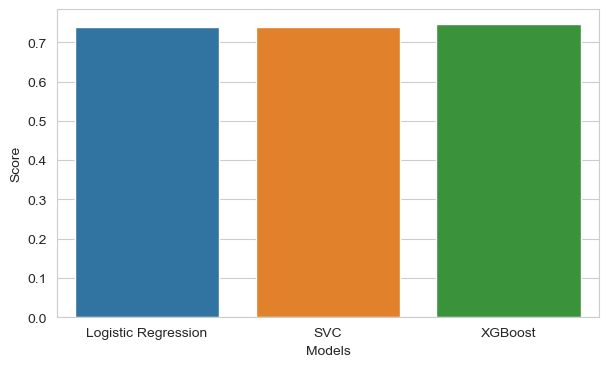

In [341]:
sns.barplot(data = all_models_kappa, x='Models', y='Score')

In [342]:
matthews_corrcoef(y_test, y_pred)

0.7916401750238151

## SHAP

In [344]:
column_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), catcols),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(
    class_weight="balanced",
    max_iter=10000,
    random_state=101,
    penalty="l1",
    solver="saga",
)

model_shap.fit(X_train_trans, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [345]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[239  18   3]
 [ 10 101  25]
 [ 24  92 642]]
              precision    recall  f1-score   support

       Black       0.88      0.92      0.90       260
    Hispanic       0.48      0.74      0.58       136
       White       0.96      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.77      0.84      0.79      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 963   47   28]
 [  32  420   91]
 [  65  378 2591]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1038
    Hispanic       0.50      0.77      0.61       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.85      0.81      4615
weighted avg       0.89      0.86      0.87      4615



In [347]:
operations = [
    ("OneHotEncoder", column_trans_shap),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="saga",
        ),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring_hispanic, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_hispanic    0.455
train_precision_hispanic   0.496
test_recall_hispanic       0.726
train_recall_hispanic      0.779
test_f1_hispanic           0.559
train_f1_hispanic          0.606
dtype: float64

In [348]:
features = column_trans_shap.get_feature_names_out()

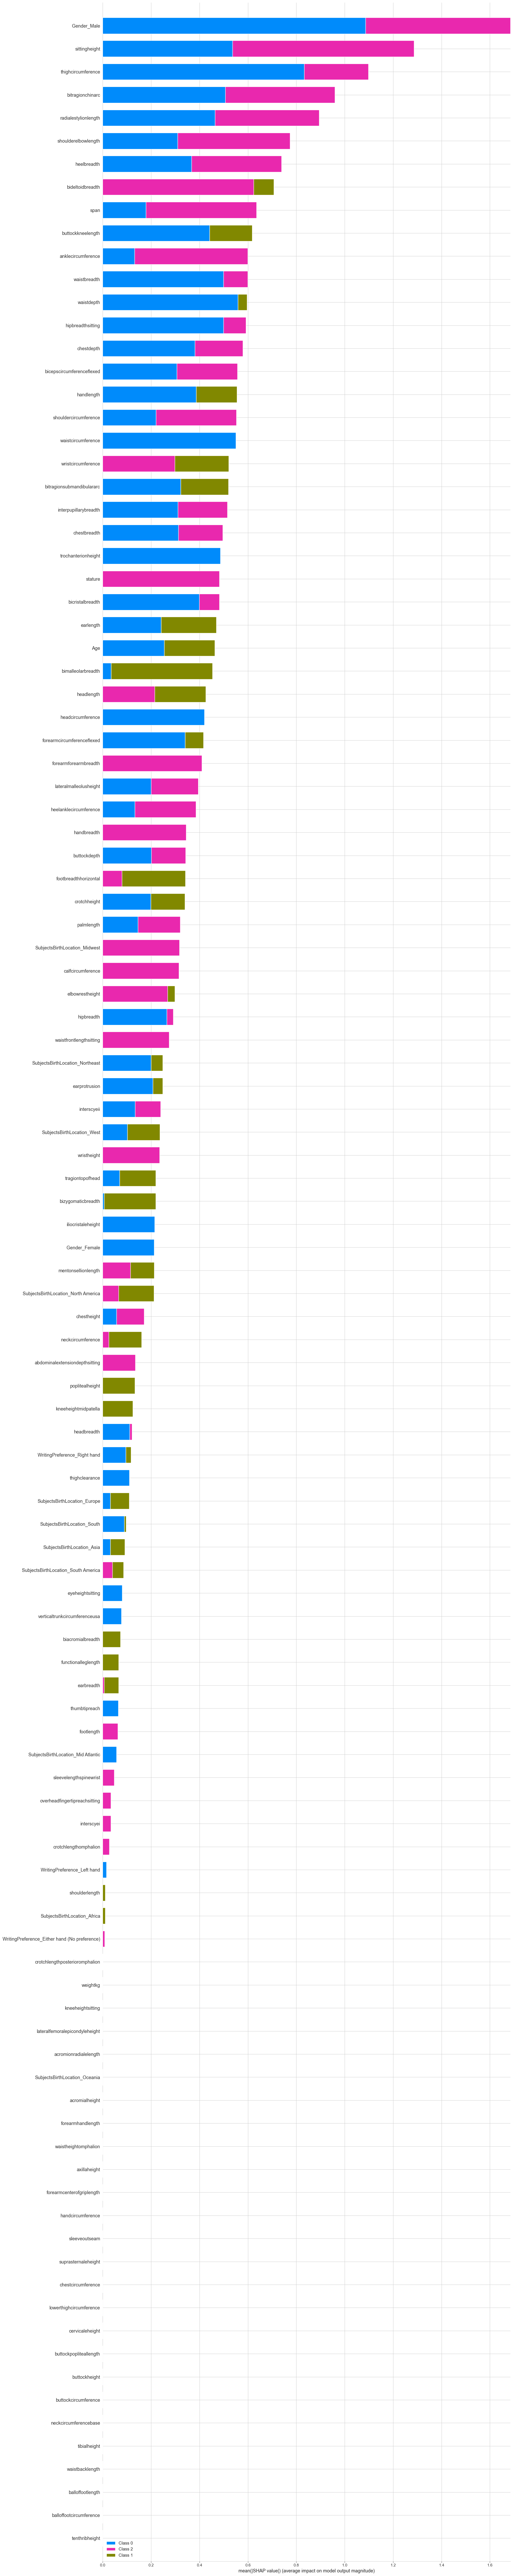

In [355]:
shapv = shap.LinearExplainer(model_shap, X_train_trans)
shap_values = shapv.shap_values(X_test_trans)

shap.summary_plot(shap_values, max_display=300, feature_names=features, plot_size=(20, 100))

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [356]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), catcols), 
                                       remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=42))]

final_model = Pipeline(steps=operations_final)

In [357]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [358]:
average_man = X[X.Gender=="Male"].describe(include="all").loc["mean"]
average_man

abdominalextensiondepthsitting    255.449
acromialheight                   1442.946
acromionradialelength             335.819
anklecircumference                229.591
axillaheight                     1331.098
balloffootcircumference           252.166
balloffootlength                  201.230
biacromialbreadth                 416.004
bicepscircumferenceflexed         358.580
bicristalbreadth                  275.632
bideltoidbreadth                  510.928
bimalleolarbreadth                 74.844
bitragionchinarc                  331.656
bitragionsubmandibulararc         315.718
bizygomaticbreadth                142.435
buttockcircumference             1021.294
buttockdepth                      246.362
buttockheight                     889.500
buttockkneelength                 619.217
buttockpopliteallength            504.001
calfcircumference                 392.427
cervicaleheight                  1519.422
chestbreadth                      289.787
chestcircumference               1

In [364]:
average_man["Gender"] = "Male"
average_man["SubjectsBirthLocation"] = "Texas"
average_man["WritingPreference"] = "Right hand"

In [365]:
final_model.predict(pd.DataFrame(average_man).T)

array(['White'], dtype=object)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___